# Xephyr library is loaded and you can use all classes and methods

In [1]:
.x loadXephyr.C

(int) 0


In [2]:
errorHandler::globalPrintLevel = 1;  // print level 3 = Error only , 2 = Warning,  1= Info, 0 = Debug

In [3]:
// add path to include files to ROOT (in the file I'm going to load there are some Xephyr includes) 
gInterpreter->AddIncludePath("../src");  // in this case is just XEPHYR src from next dir.

In [4]:
.L ../../SR1/StatisticalAnalyses/xephyr_sr1_likelihood/src/likelihoodDef.cxx

In [5]:
pdfLikelihood likeHood = getTheLikelihood(50.);  // 50. GeV mass

pdfLikelihood - INFO: bkg component named hband added to    SAFEGUARDED
pdfLikelihood::initialize - INFO :  initialize..... 
	Likelihood::addParameter - Info : Adding parameter Sigma  with ID -1  to PL xe1T
INFO :  adding sys for BKG component hband
	Likelihood::addParameter - Info : Adding parameter ERscale  with ID 1  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _PY  with ID 2  to PL xe1T
	Likelihood::addParameter - Info : Adding parameter _RF  with ID 3  to PL xe1T
INFO :  adding sys for SIGNAL component wimp_0050gev_gamma_-1.0sigma_alpha_-1.0sigma_eta_-1.0sigma_acceptance_par_0.0sigma

------ WARNING -------  Safeguard is turned OFF altough you have set components to be safeguarded this is ignored -----

pdfLikelihood::initialize - INFO :  initialization SUCCESSFUL. 


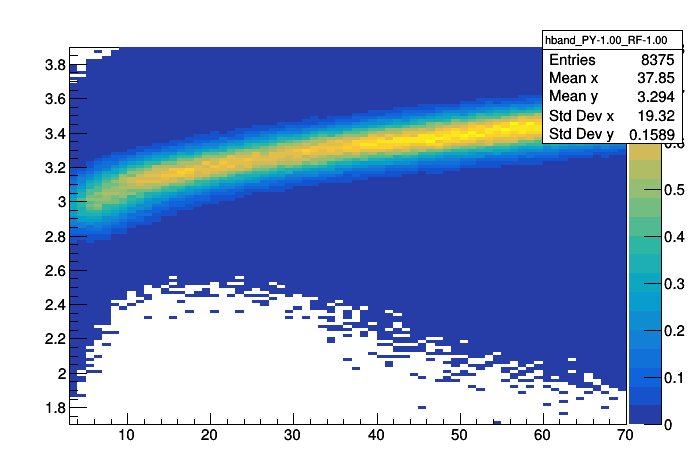

In [6]:
TCanvas *c = new TCanvas();
pdfComponent *ER = likeHood.bkg_components[0] ;
TH2F h = ER->getInterpolatedHisto();  // ER
h.Draw("colz");
c->Draw();

Now you couold for example change the value of one of the nuissance parameter and get the relative histogram interpolated... Let's do that!

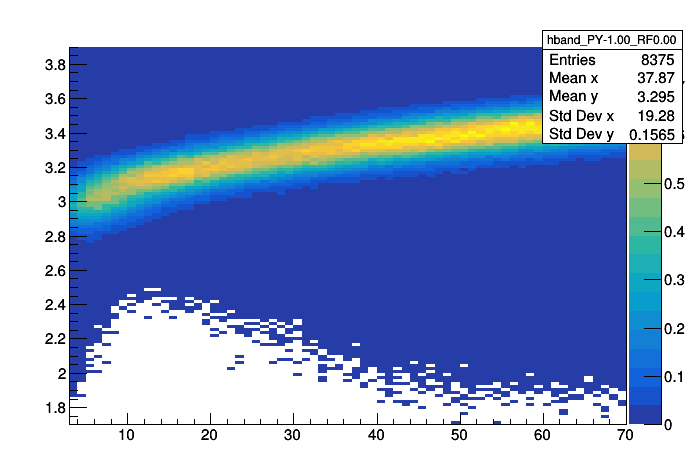

In [7]:
TCanvas *c2 = new TCanvas();
//scaleSys* S1 = (ER->myScaleUnc)[0];
LKParameter* PY = likeHood.getParameter(2);
LKParameter* RF = likeHood.getParameter(3);
PY->setCurrentValue(-0.7);               // Setting the value of RF to -1.7 sigma from its standard value (rememer the value will be interpolated)
RF->setCurrentValue(0.35);
TH2F h2 = ER->getInterpolatedHisto();
h2.Draw("colz");
c2->Draw();


##### Now let's add a Signal PdfComponent

In [8]:
pdfComponent *Signal = likeHood.signal_component;

#### And let's draw it, just for fun...

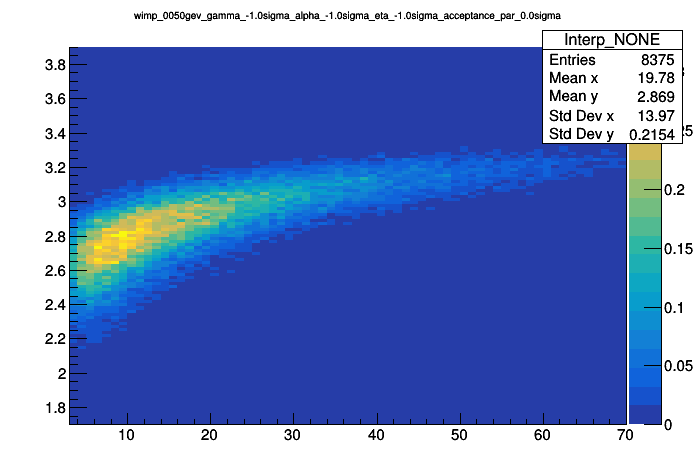

In [9]:
TCanvas *c3 = new TCanvas();
TH2F h3 = Signal->getInterpolatedHisto();
h3.Draw("colz");
c3->Draw();

#### Now let's add some data

In [10]:
dataHandler *data = likeHood.data;

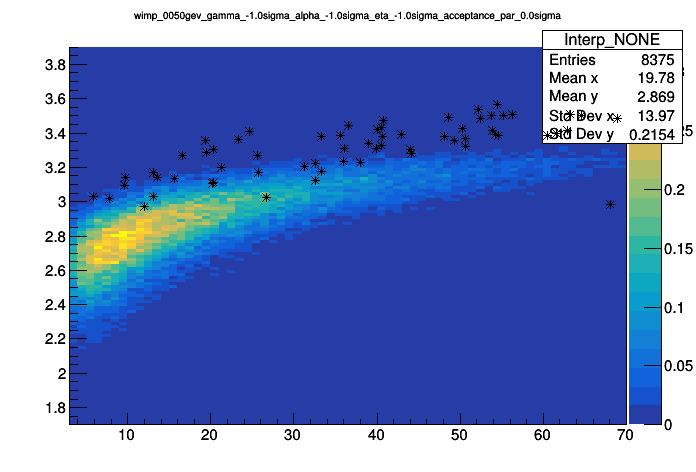

In [11]:
data->drawS1S2("same*");
c3->Draw();

# Now it's time for some likelihood game

In [13]:
//pl.maximize(false);             
likeHood.printCurrentParameters(); 
//pl.printInitialParameters();

 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Free               0                 
  2 _PY                  Nuisance        -0.7                 
  3 _RF                  Nuisance        0.35                 


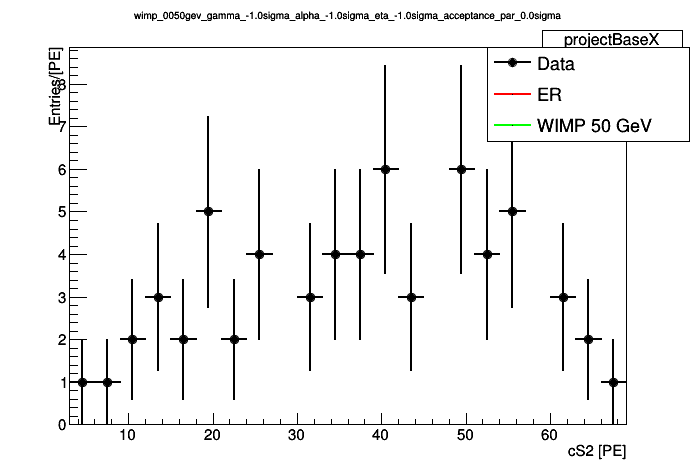

 Id Name                 Type         Current Value               Uncertainty
 -1 Sigma                Of interest        0                 
  1 ERscale              Free               0                 
  2 _PY                  Nuisance        -0.7                 
  3 _RF                  Nuisance        0.35                 
Data   63
Bkg    538.775
Signal 0 POI 0  SignalMultiplier  0.00716552
...... That signal scaled is 0


Info in <TH1D::Add>: Attempt to add histograms with different bin limits - trying to use TH1::Merge


In [14]:
// class example to compare histograms
histoCompare p = likeHood.getModelCompare();
//p.setNameofComponent(1,"flat");
//p.setNameofComponent(1,"AC");
p.setNameofComponent(1,"ER");
p.setNameofComponent(2,"WIMP 50 GeV");
p.rebinY = 1;
p.rebinX = 3;
p.doStack = true;
p.titleY="Entries/[PE]";
p.titleX="cS2 [PE]";
p.projectionMin = 3;
p.projectionMax = 3.6;
p.projectionX = true;
//p.compareWithRatio();
TCanvas *c4 = new TCanvas();
p.compare();

c4->Draw();

In [ ]:
AsymptoticExclusion as( &pl, 0.1);  // 0.1  --> means 90% CLs
  

  
//just compute the sensitivity 
//  as.computeSensitivity();
  
as.setNscanPoints(100);   // set the number of scan points for limit computation, the pvalues are computed in steps of the parameter of interest untill the CL is reached.
//as.setScanMax(100.);    // Set the range of the scan (default 3 sigma from expected sensitivity)
//as.setScanMin(0.);      // Set the range of the scan (default 0.) 
  
  
as.setQTilde(true);            

In [ ]:
as.computeLimits();       // compute the sensitivity first then the CLs limit
  
//as.LikelihoodScan();
  
as.writeToFile("example_limit_"); 


# If you go at the bottom of the previous print out you'll see the result:
```
OBSERVED limit not scaled mu 3.42441  cross section no cLS 2.06282e-46  test stat value no cls -999  cross section  2.06282e-46  test stat value -999
```

The important number is cross section no CLs 2.06e-46 cm^2